<img src="Images/Logo.png" alt="Logo NSI" style="float:right">

<h1 style="text-align:center">Chapitre 11 : Recherche dichotomique dans un tableau trié</h1>

Le fait qu'un tableau soit trié, par exemple, par ordre croissant, facilite de nombreuses opérations.  
L'une d'entre elles est la recherche d'un élément. 

In [1]:
def recherche_sequentielle(t, v):
    """renvoie une position de v dans le tableau t,
    supposé trié, et None si v ne s'y trouve pas"""
    for i in range(len(t)):
        if t[i] == v:
            return i
    return None

<center><img src="Images/RechercheLineaire.gif" alt="Recherche linéaire"></center>

Il est possible de tirer profit de la relation d'ordre du tableau.  
En effet, il suffit de comparer la valeur recherchée avec la valeur située au milieu du tableau :
* Si elle est plus petite, on peut restreindre la recherche à la moité gauche du tableau.
* Sinon, on la restraint à la moitié droite du tableau.
En répétant ce procédé, on divise la zone de recherche par deux à chaque étape (c'est le principe **diviser pour régner** qui est appliqué dans de nombreux algorithmes). 

Très rapidement, on parviendra soit à la valeur recherchée, soit à un intervalle vide.

Il s'agit de la **recherche dichotomique**

<center><img src="Images/RechercheDichotomique.gif" alt="Recherche dichotomique" width="400"></center>

## Mise en oeuvre
Nous souhaitons définir une fonction qui recherche la valeur `v` dans le tableau `t`.
```python
def recherche_dichotomique(t, v):
```
Le tableau `t` est supposé **trié par ordre croissant**.  

La fonction renvoie la position dans le tableau `t` à laquelle se trouve la valeur `v`. Si la valeur `v` n'apparaît pas dans le tableau `t`, la fonction renvoie `None`.

Pour mettre en oeuvre la recherche dichotomique, on va délimiter la portion du tableau `t` dans laquelle la recherche est actuellement réduite à l'aide de deux indices `g` et `d`.  

Initialement, ces deux indices délimitent l'intégralité du tableau :
```python
g = 0
d = len(t) - 1
```

         0              g             d
        +--------------+---------------+--------------+
    t   | éléments < v |      ...      | éléments > v |
        +--------------+---------------+--------------+

Le programme va alors répéter le principe de dichotomie tant que cette portion n'est pas vide, c'est-à dire tant que la condition `g <= d` est vraie.
```python
while g <= d:
    # invariant : 0 <= g et d < len(t)
    # invariant : v ne peut se trouver que dans t[g..d] 
```
Il faut examiner l'élément central pour prendre notre décision.
```python
m = (g + d) // 2
```

         0              g      m      d
        +--------------+------+-+------+--------------+
    t   | éléments < v | ...  |?|  ... | éléments > v |
        +--------------+------+-+------+--------------+

Il reste à comparer `v` à `t[m]` :
* Si la valeur `v` est plus grande, alors la recherche peut se restreindre à la moitié droite.
```python
if t[m] < v:
    g = m + 1
```
* Si la valeur `v` est plus petite, alors la recherche peut se restreindre à la moitié gauche.
```python
elif t[m] > v:
    d = m - 1
```
* Si la valeur `v` est égale à `t[m]`, c'est qu'on a trouvé une occurrence de la valeur `v`.
```python
else:
   return m
```

Si l'on sort de la boucle, cela signifie que la valeur `v` ne peut pas se trouver dans le tableau, car il ne contient plus que des valeurs strictement plus petites que `v` (à gauche) ou strictement plus grandes (à droite).
```python
return None
```

In [2]:
def recherche_dichotomique(t, v):
    """renvoie une position de v dans le tableau t,
    supposé trié, et None si v ne s'y trouve pas"""
    g = 0
    d = len(t) - 1
    while g <= d:
        # invariant : 0 <= g et d < len(t)
        # invariant : v ne peut se trouver que dans t[g..d]     
        m = (g + d) // 2
        if t[m] < v:
            g = m + 1
        elif t[m] > v:
            d = m - 1
        else:
            return m
    # la valeur ne se trouve pas dans le tableau
    return None

## Preuve de l'algorithme
Montrons que le programme ne va pas échouer en accédant au tableau `t` en dehors de ses bornes.  
Le seul accès au tableau `t` se fait à l'indice `m`, dans la boucle `while`. Cet indice `m` est calculé comme la moyenne entière de `g` et `d`, dont on sait qu'ils vérifient`g <= d` car on est dans la boucle.  
Par ailleurs `0 <= g` et `d < len(t)` sont des invariants de boucle (lorsque `g` ou `d` sont modifiés dans la boucle, on peut vérifier que les inégalités sont préservées).  
Par conséquent, à l'intérieur de la boucle, on a : ` 0 <= g <= m <= d < len(t)`

### Correction
Montrons que, si un entier est renvoyé, il s'agit bien d'une position ou la valeur `v` apparaît.  
L'instruction `return m` n'est exécutée que lorsque l'égalité `t[m] == v` est vérifiée.

### Complétude
Montrons que, si la valeur `None` est renvoyée, alors la valeur `v` n'apparaît pas dans le tableau `t`.  

On utilise l'**invariant de boucle** : `v ne peut se trouver que dans t[g..d]`.  
* C'est vrai intialement car `g` et `d` sont initialisées à `0` et `len(t) - 1`.
* Lorsque `g` et `d` sont modifiés, cet invariant est préservé :
    * Lorsqu'on modifie `g`, on a `t[m] < v` et on effectue `g = m + 1`. 
    
    Le tableau étant trié, on a donc : `t[g..m-1] <= t[m] < v`
    et donc `v` ne peut pas se trouver dans `t[g..m]`. 
    
    Elle ne peut donc se trouver que dans `t[m+1..d]`, c'est-à-dire `t[g..d]`.
    * Lorsqu'on modifie `d`, on a `t[m] > v` et on effectue `d = m - 1`. 
    
    Le tableau étant trié, on a donc : `v < t[m] <= t[m+1..d]`
    
    et donc `v` ne peut pas se trouver dans `t[m..d]`. 
    
    Elle ne peut donc se trouver que dans `t[g..m-1]`, c'est-à-dire `t[g..d]`.

### Terminaison
La valeur entière `d - g` est un **variant de boucle**. Elle décroît d'au moins une unité à chaque itération de la boucle `while`, tout en restant positive ou nulle. Elle ne peut décroître indéfiniment. On finira donc par avoir `d < g` et une sortie de boucle (si on n'a pas trouvé la valeur `v` avant).

## Efficacité
Le nombre de valeurs du tableau `t` qui ont été examinées pendant l'exécution de `recherche_dichotomique(t, v)` correspond au nombre d'itérations de la boucle `while` ou encore au nombre de valeurs prises par la variable `m`. Le temps d'exécution de `recherche_dichotomique` est directement proportionnel à ce nombre.

Le pire cas est celui ou la valeur `v` n'apparaît pas dans le tableau `t`, ce qui nous oblige à répéter la boucle jusqu'à ce que cet intervalle soit vide.

In [7]:
def complexite_dichotomie(n):
    """Renvoie le nombre d'étapes nécessaires pour obtenir 0 
    en divisant l'entier n par 2"""
    nb_op = 0
    while n > 0:
        n = n // 2
        nb_op += 1
    return nb_op

for taille in [10 ** i for i in range(10)]:
    print(f"Pour un tableau de taille n = {taille}, il faut, au plus, {complexite_dichotomie(taille)} étapes")

Pour un tableau de taille n = 1, il faut, au plus, 1 étapes
Pour un tableau de taille n = 10, il faut, au plus, 4 étapes
Pour un tableau de taille n = 100, il faut, au plus, 7 étapes
Pour un tableau de taille n = 1000, il faut, au plus, 10 étapes
Pour un tableau de taille n = 10000, il faut, au plus, 14 étapes
Pour un tableau de taille n = 100000, il faut, au plus, 17 étapes
Pour un tableau de taille n = 1000000, il faut, au plus, 20 étapes
Pour un tableau de taille n = 10000000, il faut, au plus, 24 étapes
Pour un tableau de taille n = 100000000, il faut, au plus, 27 étapes
Pour un tableau de taille n = 1000000000, il faut, au plus, 30 étapes


De manière générale, pour un tableau `t` de taille `n`, le temps d'exécution de `recherche_dichotomique(t, v)` est, dans le pire des cas, égal au plus petit entier $k$ tel que $2^k > n$.  
Il s'agit d'un algorithme de **complexité logarithmique**. Il est donc extrêmement efficace.

In [10]:
# Récupération des données
from time import perf_counter
from random import randint

# On utilise une fonction pour générer des tableaux aléatoire de taille n
def tableau_aleatoire(n):
    """Renvoie un tableau d'entiers aléatoires de taille n"""
    tab = [0] * n
    for i in range(n):
        tab[i] = randint(1, n)
    return tab

nb_points = 12 # nb de points à tracer
abscisses = [0] * nb_points
ordonnees = [0] * nb_points
taille = 1_000

for i in range(nb_points):
    abscisses[i] = taille
    
    tableau = tableau_aleatoire(taille)
    tableau.sort() # on trie le tableau
    valeur = randint(1, taille) 
    
    debut = perf_counter()
    recherche_dichotomique(tableau, valeur)
    fin = perf_counter()
    ordonnees[i] = fin - debut
    
    taille = taille * 2

In [11]:
# On peut afficher les résultats
for i in range(nb_points):
    print("Il faut", round(ordonnees[i],5), "s pour rechercher un élément dans un tableau de taille", abscisses[i])

Il faut 1e-05 s pour rechercher un élément dans un tableau de taille 1000
Il faut 0.0 s pour rechercher un élément dans un tableau de taille 2000
Il faut 0.0 s pour rechercher un élément dans un tableau de taille 4000
Il faut 0.0 s pour rechercher un élément dans un tableau de taille 8000
Il faut 1e-05 s pour rechercher un élément dans un tableau de taille 16000
Il faut 1e-05 s pour rechercher un élément dans un tableau de taille 32000
Il faut 1e-05 s pour rechercher un élément dans un tableau de taille 64000
Il faut 1e-05 s pour rechercher un élément dans un tableau de taille 128000
Il faut 1e-05 s pour rechercher un élément dans un tableau de taille 256000
Il faut 1e-05 s pour rechercher un élément dans un tableau de taille 512000
Il faut 1e-05 s pour rechercher un élément dans un tableau de taille 1024000
Il faut 2e-05 s pour rechercher un élément dans un tableau de taille 2048000


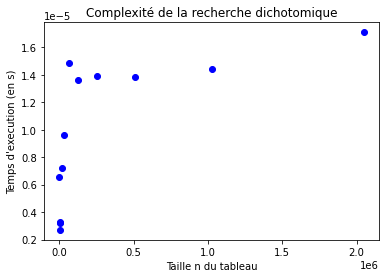

In [12]:
# On trace les nuages de points
import matplotlib.pyplot as plt

plt.figure("Complexite temporelle")
plt.title('Complexité de la recherche dichotomique')
plt.xlabel("Taille n du tableau")
plt.ylabel("Temps d'execution (en s)")  
plt.plot(abscisses, ordonnees, 'bo')
plt.show()

## Exercices

### Exercice 1
Combien de valeurs sont examinées lors d'un appel à `recherche_dichotomique([0, 1, 1, 2, 3, 5, 8, 12, 21], 7)`?

### Exercice 2
Donner un exemple d'exécution de `recherche_dichotomique` où le nombre de valeurs examinées est exactement quatre.

### Exercice 3
Modifier la fonction `recherche_dichotomique` pour afficher le nombre total de tours de boucle effectués par l'algorithme.  
Lancer le programme sur des tableaux de taille différentes (100, 1000, ...) et observer les nombres de tours affichés.  
On pourra par exemple, chercher la valeur `1` dans un tableau ne contenant que des valeurs `0` (ce qui correspond au pire cas).

### Exercice 4
Ecrire une fonction `nb_de_tours(n)` qui renvoie le plus petit entier $k$ tel que $2^k > n$, c'est-à-dire le nombre maximal de valeurs examinées par la recherche dichotomique dans un tableau de taille `n`.

### Exercice 5
Ecrire un programme qui permette à l'ordinateur de jouer à *devine le nombre* contre l'utilisateur.  
Cette fois c'est l'utilisateur qui choisit un nombre entre 0 et 100 et l'ordinateur qui doit le trouver, le plus efficacement possible.  
A chaque proposition faite par l'ordinateur, l'utilisateur doit donner une réponse sous la forme d'une chaîne de caractères parmi : `"plus grand"`, `"plus petit"` ou `"bravo"`.

## Sources :
* Balabonski Thibaut, et al. 2019. *Spécialité Numérique et sciences informatiques : 30 leçons avec exercices corrigés - Première - Nouveaux programmes*. Paris. Ellipse
* Data Structure Visualizations - [Algorithmes de recherche](https://www.cs.usfca.edu/~galles/visualization/Search.html)  - [*University of San Francisco*](https://www.cs.usfca.edu/)
* Document accompagnement Eduscol : [Recherche dichotomique](https://cache.media.eduscol.education.fr/file/NSI/76/3/RA_Lycee_G_NSI_algo-dichoto_1170763.pdf)